<h1>USArrests</h1>

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

El set de datos **USArrests** contiene el porcentaje de:

- asaltos (*Assault*)
- asesinatos (*Murder*)
- secuestros (*Rape*)

por cada $100.000$ habitantes para cada uno de los $50$ estados de USA ($1973$).

Además, también incluye:
- el porcentaje de la población de cada estado que vive en zonas rurales (*UrbanPoP*).

In [5]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

In [6]:
datos

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
datos.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Los dos principales aspectos a tener en cuenta cuando se quiere realizar un *PCA* es identificar el valor promedio y dispersión de las variables.

La media de las variables muestra que hay tres veces más secuestros que asesinatos y $8$ veces más asaltos que secuestros.

In [14]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

La varianza es muy distinta entre las variables, en el caso de *Assault*, la varianza es varios órdenes de magnitud superior al resto.

In [17]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [19]:
#crear matriz de correlación
corr = datos.corr()
corr.style.background_gradient()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio *PCA*, la variable *Assault*, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

Por defecto, *PCA()* centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un *StandardScaler()* y un *PCA()* dentro de un pipeline. Para más información sobre el uso de pipelines consultar *Pipeline* y *ColumnTransformer*.

In [23]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [25]:
# acumulado de la varianza de todas las componentes principales
print(modelo_pca.explained_variance_ratio_.cumsum())

[0.62006039 0.86750168 0.95664248 1.        ]


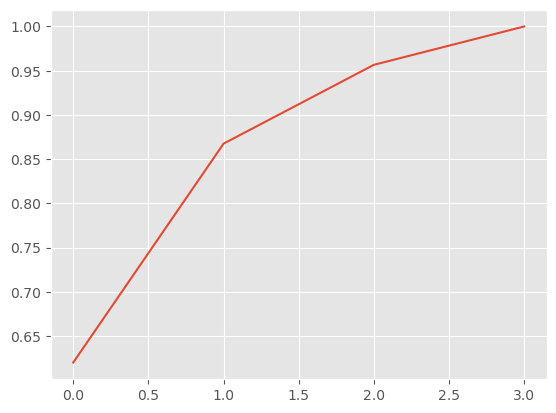

In [27]:
# representación conjunto de datos en componentes principales
plt.plot(modelo_pca.explained_variance_ratio_.cumsum())
plt.show()

In [29]:
# escalar datos
scaler = StandardScaler()
scaler.fit(datos)
# estandarizamos la observación
x_nueva = scaler.transform(datos)

In [31]:
# crear clase PCA con 0.95 varianza explicada
pca_95 = PCA(n_components = 0.95)

# obtener la proyección de la matriz datos en las componentes principales
x_nueva_pca_95 = pca_95.fit_transform(x_nueva)

# comprobamos la dimensión de x_nueva_pca_95
x_nueva_pca_95.shape

(50, 3)

In [33]:
x_nueva_pca_95_df = pd.DataFrame(data = x_nueva_pca_95,
                          columns = ["PC1", "PC2", "PC3"])
x_nueva_pca_95_df

,PC1,PC2,PC3
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557
5,1.514563,-0.987555,1.095007
6,-1.358647,-1.088928,-0.643258
7,0.047709,-0.325359,-0.718633
8,3.013042,0.039229,-0.576829
9,1.639283,1.278942,-0.342460


Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos *explained_variance_* y *explained_variance_ratio_ del modelo*.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408 ]


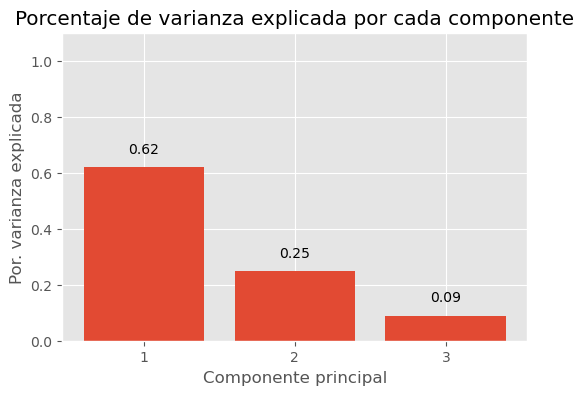

In [52]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca_95.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_95.n_components_) + 1,
    height = pca_95.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, pca_95.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_95.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el $62\%$ de la varianza observada en los datos y la segunda el $24.7\%$. La última componente no supera el $10\%$ de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248]


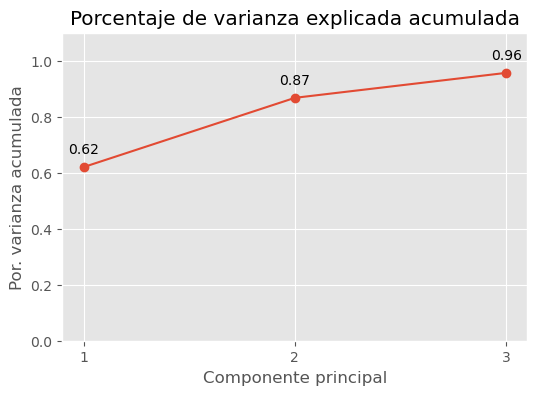

In [68]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_95.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(pca_95.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca_95.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_95.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el $87\%$ de la varianza observada.

Fin